Group Facilitator : Ruchi Ghiya <br>
Team Member : Rahul Aggarwal

### Telecom Churn Case Study ###
**Buisness Understanding**<br>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

**Buisness Goal**<br>
1.Predict churn for high value customers-Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).<br>
2.Usuage Based churn-Those who have not made any calls (either incoming or outgoing) & have not used mobile internet even once in the churn phase<br>
3.predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months<br>

 

In [150]:
#importing the reqiuired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#importing the required lib for Tree model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [151]:
#path for the csv file
path=r'C:\Users\acer\Documents\Upgrad-Assignment\telecom churn case study'

In [152]:
#To set the max rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [153]:
#importing the csv file 
telecom_df=pd.read_csv(path+'/telecom_churn_data.csv')
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [154]:
#checking the shape of the df
telecom_df.shape

(99999, 226)

In [155]:
#understanding the data
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


*As data is quite large so the info is not visible*

In [156]:
telecom_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [157]:
#Checking for empty columns
telecom_df.isnull().all()

mobile_number               False
circle_id                   False
loc_og_t2o_mou              False
std_og_t2o_mou              False
loc_ic_t2o_mou              False
last_date_of_month_6        False
last_date_of_month_7        False
last_date_of_month_8        False
last_date_of_month_9        False
arpu_6                      False
arpu_7                      False
arpu_8                      False
arpu_9                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
onnet_mou_9                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
offnet_mou_9                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_ic_mou_9               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
roam_og_mou_9               False
loc_og_t2t_mou

In [158]:
#Now check what percent of values are missing in a column
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

**Data Cleaning & Data Preparation**


In [159]:
#checking the unique values
telecom_df.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [160]:
#droping all the values which have unique values as 1
for col in telecom_df:
    if telecom_df[col].nunique()==1:
        telecom_df.drop(col,inplace=True,axis=1)

In [161]:
telecom_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [162]:
telecom_df.shape

(99999, 210)

In [163]:
#now again checking the missing values
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)),2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou

In [164]:
#Dropping Columns fb_user_6,fb_user_7,fb_user_8
telecom_df=telecom_df.drop(columns=['fb_user_6','fb_user_7','fb_user_8'])

In [165]:
telecom_df.shape

(99999, 207)

In [166]:
#As we can see most of the values(74%) in the dataframe is missing ,
#we can impute the values in recharge amount from nan to 0.0 and can derive new variables

telecom_df['total_rech_data_6'] = telecom_df['total_rech_data_6'].replace(np.NaN,0.0)
telecom_df['total_rech_data_7'] = telecom_df['total_rech_data_7'].replace(np.NaN,0.0)
telecom_df['total_rech_data_8'] = telecom_df['total_rech_data_8'].replace(np.NaN,0.0)

telecom_df['av_rech_amt_data_6'] = telecom_df['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_7'] = telecom_df['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_8'] = telecom_df['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [167]:
#now again checking the missing values
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)),2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou

**Deriving New Feature**

In [168]:
#Deriving new feature for high value customers for total data consumed in months(6,7,8)
telecom_df['total_rech_data_amt_6'] = telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_rech_data_amt_7'] = telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']
telecom_df['total_rech_data_amt_8'] = telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8']

*Now as per the buisness knowledge provided , need to filter the high value customers  hence calculating the average amount for 6 & 7 months i.e for good phase*

In [169]:
#getting the average for recharge amount for good phase 
telecom_df['total_rech_amnt_gdphase_6_7']=(telecom_df['total_rech_data_amt_6']+telecom_df['total_rech_amt_6']+telecom_df['total_rech_data_amt_7']+telecom_df['total_rech_amt_6'])/2

In [170]:
telecom_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [171]:
#As new featues are derived removing the older columns
telecom_df=telecom_df.drop(columns=['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'])

In [172]:
telecom_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

**Filtering High Value Customer**

In [173]:
#Now filtering the high Value Customer for 70th percentile range
high_value_cust=telecom_df.total_rech_amnt_gdphase_6_7.quantile(0.7)

In [174]:
#filtering the dataframe with values for high value customers
telecom_df_hcv=telecom_df[telecom_df.total_rech_amnt_gdphase_6_7>high_value_cust]

In [175]:
#70th percentile of high value customer and the shape of the new filtered df
print("70th percentile of the average recharge amount in the first two months (6,7) is ",high_value_cust)
telecom_df_hcv.shape

70th percentile of the average recharge amount in the first two months (6,7) is  494.0


(29990, 205)

**So after filtering the hogh value customers we have around 29.9k rows left**

In [176]:
#Now tagging the churners as 0 & 1 for the fourth month i.e 9th month
telecom_df_hcv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0             0.00            0.00          0.0          0.0
6          2572.49           65.91          0.0          0.0
7             0.00            0.00          0.0          0.0
8            34.91          142.18          0.0          0.0
13          631.86          446.09          0.0          0.0

**Tag churners and remove attributes of the churn phase**

In [177]:
#now churn=1, else =0
telecom_df_hcv['churn'] = telecom_df_hcv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1).apply(lambda x: 0 if x>0 else 1)

In [178]:
telecom_df_hcv.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
6      7001051193   429.023   190.704   255.114  114.751        71.03   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
6         45.03        76.66        15.23        262.73         49.24   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
6          92.08         50.33           0.00           0.00           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
6            0.00           0.00           0.00           0.00           0.00   
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
6              71.03             45.03             76.14             15.23   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
6             252.23             48.71             80.63             50.33   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
6              10.38              0.00              0.00              0.00   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
6               0.11               0.0              0.00               0.0   
7               0.00               0.0              0.00               NaN   
8               0.00               0.0              7.15               0.0   
13              0.00               0.0              0.49               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
6         333.64         93.74        156.78         65.56              0.00   
7         422.16        533.91        255.79    

In [179]:
telecom_df_hcv.shape

(29990, 206)

In [180]:
#As we have now marked the Churn and Non churn customers now deleting the columns for ninth month or having _9 as prefix
for col in telecom_df_hcv.columns:
   if '_9' in col:
       telecom_df_hcv.drop(col,inplace=True,axis=1)

In [181]:
telecom_df_hcv.shape

(29990, 155)

In [182]:
#now again checking the missing values
round(100*(telecom_df_hcv.isnull().sum()/len(telecom_df_hcv.index)),2)

mobile_number                   0.00
arpu_6                          0.00
arpu_7                          0.00
arpu_8                          0.00
onnet_mou_6                     1.53
onnet_mou_7                     2.64
onnet_mou_8                     5.40
offnet_mou_6                    1.53
offnet_mou_7                    2.64
offnet_mou_8                    5.40
roam_ic_mou_6                   1.53
roam_ic_mou_7                   2.64
roam_ic_mou_8                   5.40
roam_og_mou_6                   1.53
roam_og_mou_7                   2.64
roam_og_mou_8                   5.40
loc_og_t2t_mou_6                1.53
loc_og_t2t_mou_7                2.64
loc_og_t2t_mou_8                5.40
loc_og_t2m_mou_6                1.53
loc_og_t2m_mou_7                2.64
loc_og_t2m_mou_8                5.40
loc_og_t2f_mou_6                1.53
loc_og_t2f_mou_7                2.64
loc_og_t2f_mou_8                5.40
loc_og_t2c_mou_6                1.53
loc_og_t2c_mou_7                2.64
l

In [183]:
#Now dropping the columns which have more 30% missing values
dropCols=  100*telecom_df_hcv.isnull().sum()/len(telecom_df_hcv.index)
missingval_col = dropCols[dropCols > 30.0].index
telecom_df_hcv.drop(missingval_col,axis=1,inplace=True)

In [184]:
date_col=telecom_df_hcv.select_dtypes(include=['object'])
date_col.shape

(29990, 3)

In [185]:
#changing the data type of columns having date from object to datatime 
for col in date_col.columns:
    telecom_df_hcv[col]=pd.to_datetime(telecom_df_hcv[col])   


In [186]:
telecom_df_hcv.shape

(29990, 134)

In [187]:
#Checking missing values
round(100*(telecom_df_hcv.isnull().sum()/len(telecom_df_hcv.index)),2)

mobile_number                  0.00
arpu_6                         0.00
arpu_7                         0.00
arpu_8                         0.00
onnet_mou_6                    1.53
onnet_mou_7                    2.64
onnet_mou_8                    5.40
offnet_mou_6                   1.53
offnet_mou_7                   2.64
offnet_mou_8                   5.40
roam_ic_mou_6                  1.53
roam_ic_mou_7                  2.64
roam_ic_mou_8                  5.40
roam_og_mou_6                  1.53
roam_og_mou_7                  2.64
roam_og_mou_8                  5.40
loc_og_t2t_mou_6               1.53
loc_og_t2t_mou_7               2.64
loc_og_t2t_mou_8               5.40
loc_og_t2m_mou_6               1.53
loc_og_t2m_mou_7               2.64
loc_og_t2m_mou_8               5.40
loc_og_t2f_mou_6               1.53
loc_og_t2f_mou_7               2.64
loc_og_t2f_mou_8               5.40
loc_og_t2c_mou_6               1.53
loc_og_t2c_mou_7               2.64
loc_og_t2c_mou_8            

In [188]:
#replacing the Nan with 0 in dataset
telecom_df_hcv=telecom_df_hcv.apply(lambda x:x.fillna(0),axis=0)

In [189]:
#checking the null values once again
round(100*(telecom_df_hcv.isnull().sum()/len(telecom_df_hcv.index)),2)

mobile_number                  0.0
arpu_6                         0.0
arpu_7                         0.0
arpu_8                         0.0
onnet_mou_6                    0.0
onnet_mou_7                    0.0
onnet_mou_8                    0.0
offnet_mou_6                   0.0
offnet_mou_7                   0.0
offnet_mou_8                   0.0
roam_ic_mou_6                  0.0
roam_ic_mou_7                  0.0
roam_ic_mou_8                  0.0
roam_og_mou_6                  0.0
roam_og_mou_7                  0.0
roam_og_mou_8                  0.0
loc_og_t2t_mou_6               0.0
loc_og_t2t_mou_7               0.0
loc_og_t2t_mou_8               0.0
loc_og_t2m_mou_6               0.0
loc_og_t2m_mou_7               0.0
loc_og_t2m_mou_8               0.0
loc_og_t2f_mou_6               0.0
loc_og_t2f_mou_7               0.0
loc_og_t2f_mou_8               0.0
loc_og_t2c_mou_6               0.0
loc_og_t2c_mou_7               0.0
loc_og_t2c_mou_8               0.0
loc_og_mou_6        

Now we dont have the null values in any of the column

In [190]:
telecom_df_hcv.shape

(29990, 134)

**We have cleaned the data , current shape of the data is (29990,134).Now we will proceed with Exploratory Data Analysis**

**EDA**

In [191]:
#Creating function to ------------------ Checking the values of variable with respect to churn , to see what are the factors which are responsible for churn 
#Function to create Bar and Box plot with log scale
def logBar_boxplt(colName):
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.barplot(data=telecom_df_hcv, y=colName+"_6",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,2)
    plt.yscale("log")
    sns.boxplot(data=telecom_df_hcv, y=colName+"_6",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,3)
    sns.barplot(data=telecom_df_hcv, y=colName+"_7",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,4)
    plt.yscale("log")
    sns.boxplot(data=telecom_df_hcv, y=colName+"_7",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,5)
    sns.barplot(data=telecom_df_hcv, y=colName+"_8",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,6)
    plt.yscale("log")
    sns.boxplot(data=telecom_df_hcv, y=colName+"_8",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.show()

In [192]:
#Function to create Bar and Box plot with out log scale
def nologBar_boxplt(colName):
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.barplot(data=telecom_df_hcv, y=colName+"_6",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,2)
    sns.boxplot(data=telecom_df_hcv, y=colName+"_6",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,3)
    sns.barplot(data=telecom_df_hcv, y=colName+"_7",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,4)
    
    sns.boxplot(data=telecom_df_hcv, y=colName+"_7",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,5)
    sns.barplot(data=telecom_df_hcv, y=colName+"_8",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.subplot(3,2,6)
    
    sns.boxplot(data=telecom_df_hcv, y=colName+"_8",x="churn",hue="churn",palette=("coolwarm_r"))
    plt.show()

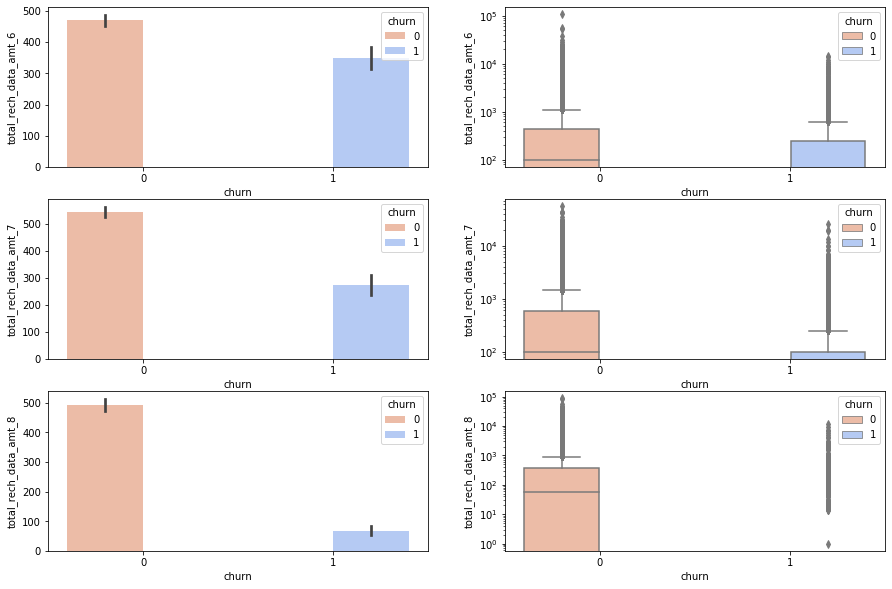

In [193]:
#Plotting against , recharge data amount
logBar_boxplt('total_rech_data_amt')

<span style='color:green'> *As per the above graphs it is visible that recharge amount is getting reduced with the months. 8th month has the lowest recharge Data amount for the customers are marked as churned, during the Action Phase*
*In Action Phase it is visible that the recharge Data value is dropped below 100*
*Also the bar plot is showing the frequency of recharge whereas the box plot is showing that only special recharge are left no additional recharge was done during Action Phase *</span>

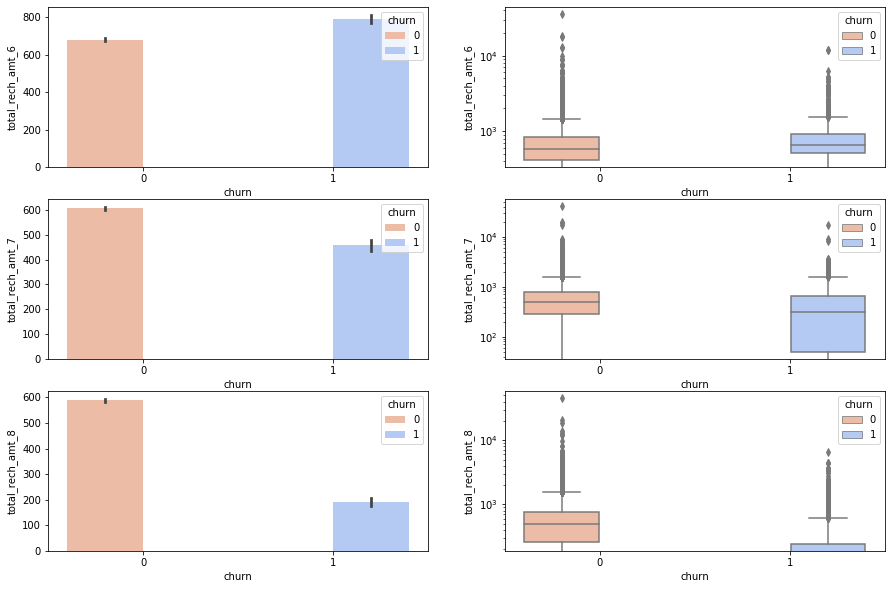

In [194]:
#Plotting against total rech amount
logBar_boxplt('total_rech_amt')

<span style='color:green'> *As per the above graphs its visible that total amount of recharge was reduced in 8th month for the churned customer.Both the bar plot and box plot shows the minimal amount of recharge done .The values of recharge is considerably dropped.*</span>

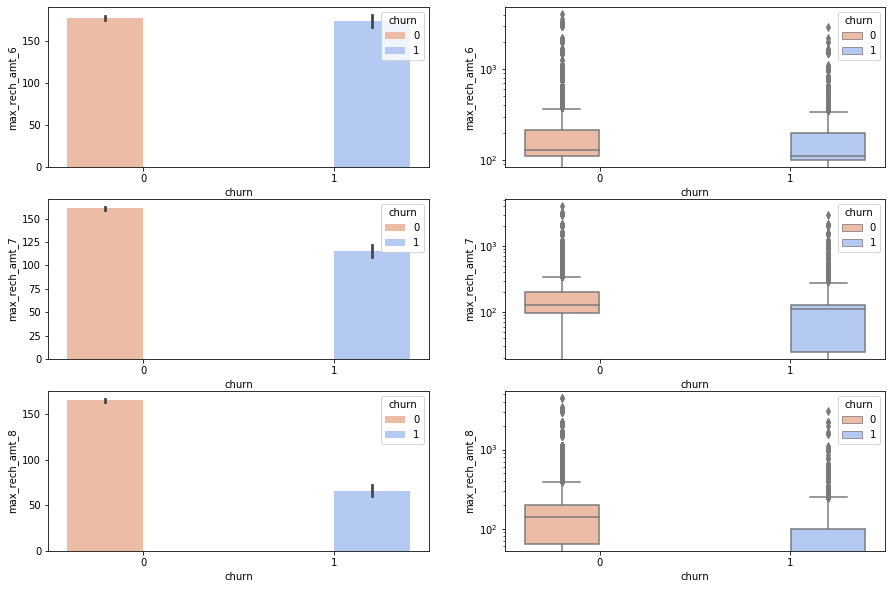

In [195]:
logBar_boxplt('max_rech_amt')

<span style='color:green'> *It is quite intersting to see that people who were going to churn in Action Phase , have recharged good amount in Good phase, but during Action Phase the amount of recharge is dropped significantly*</span>

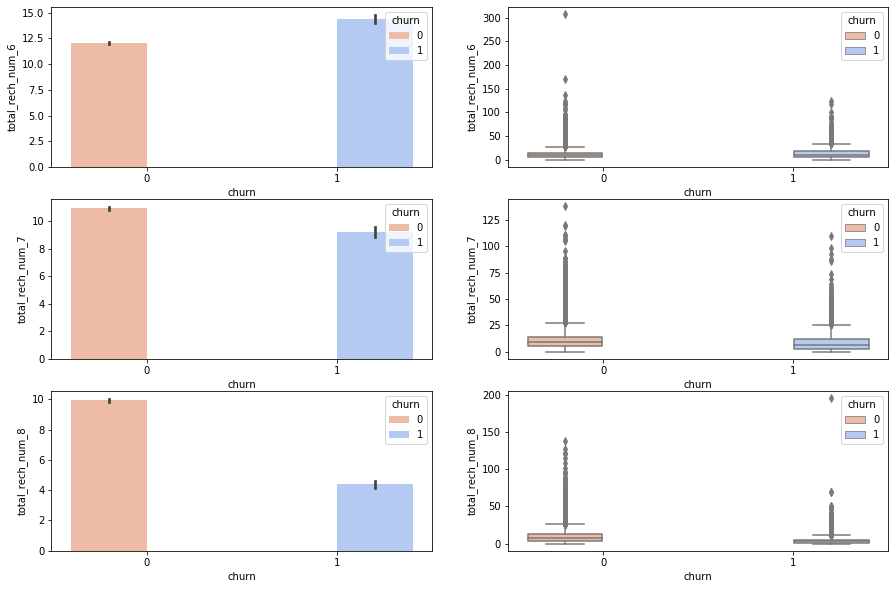

In [196]:
#Plot for total Recharge Number
nologBar_boxplt('total_rech_num')

<span style='color:green'> *As per the above graphs it is shown that frequency  of total recharge has decreased for the churned customer in the Action Phase.The decrease it quite considerable*</span>

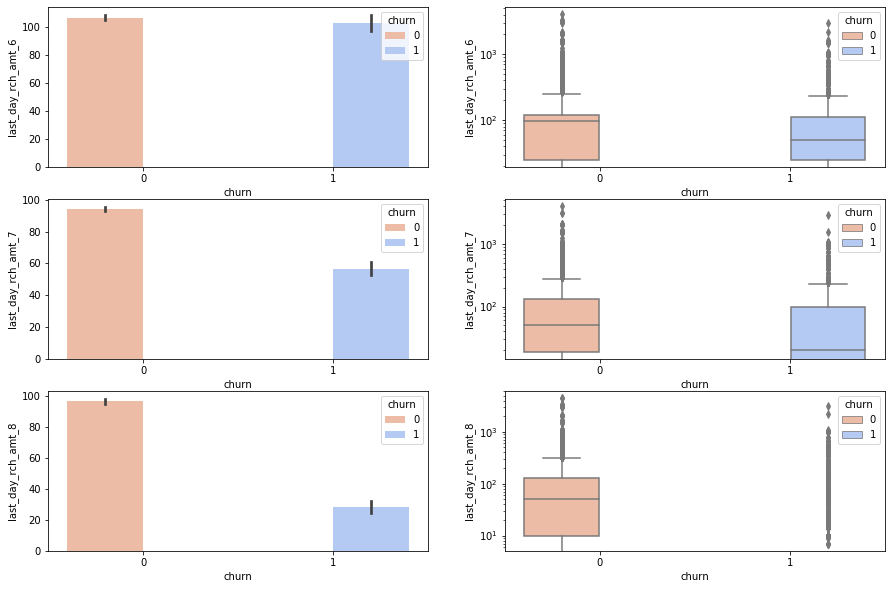

In [197]:
#Plot for last day of recharge
logBar_boxplt('last_day_rch_amt')

<span style='color:green'> *As per the above graphs the amount of recharge done on the last day was of the month 8 is very less.This shows that the consumer has decided to move out of the network and have minimize the amount of recharge which can help us predict that customer may going to churn by next month*</span>

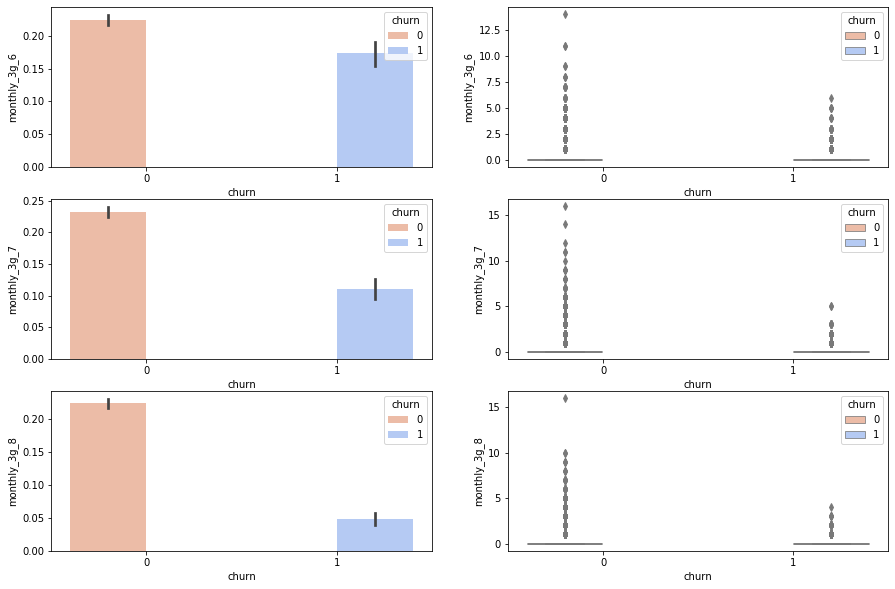

In [198]:
#Total monthly 3g calls
nologBar_boxplt('monthly_3g')

<span style='color:green'> *Monthly recharge is also decreasing as the 8 months is coming, which help in identifying the customer behaviour and we can mark such customers with chances that they will churn*</span>

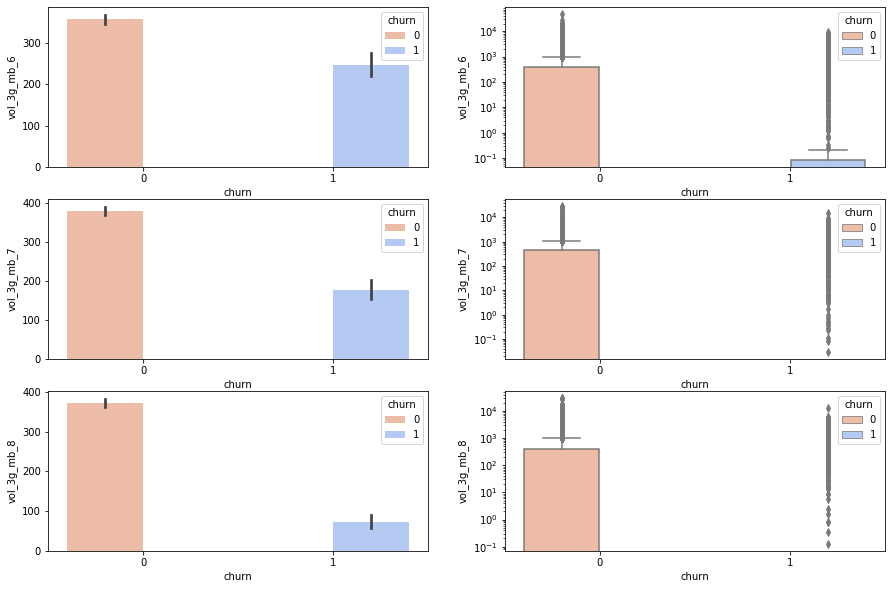

In [199]:
#Volume 3g Data plot
logBar_boxplt('vol_3g_mb')

<span style='color:green'>*Decrease in the 3g mb data consumption is also a clear indication of the customer getting churned, predicting that customer may have started to use another mobile internet services*</span>

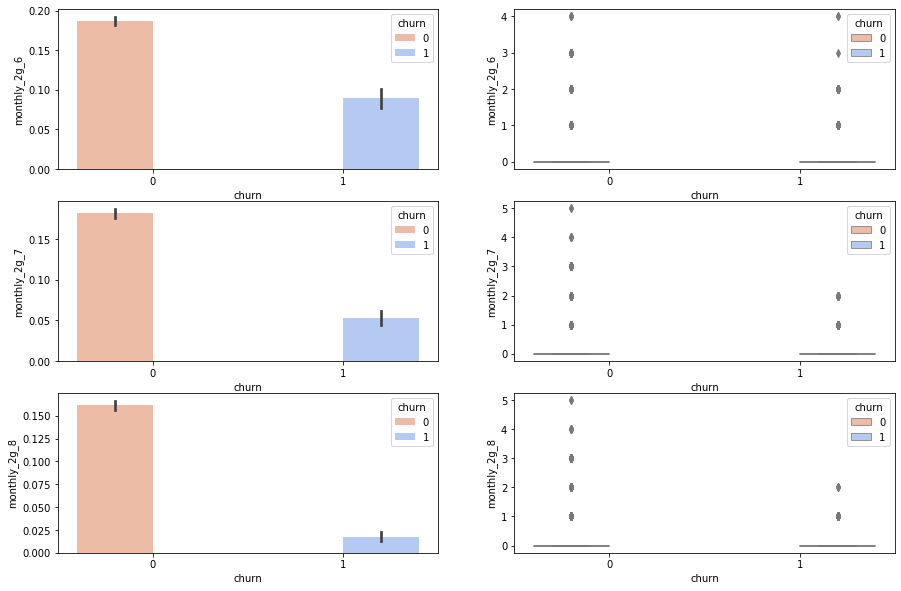

In [200]:
nologBar_boxplt('monthly_2g')

<span style='color:green'> *Similary the decrease in 2g packs is also decreased in 8th month , hence it shows clear indication that a customer will get churned*</span>

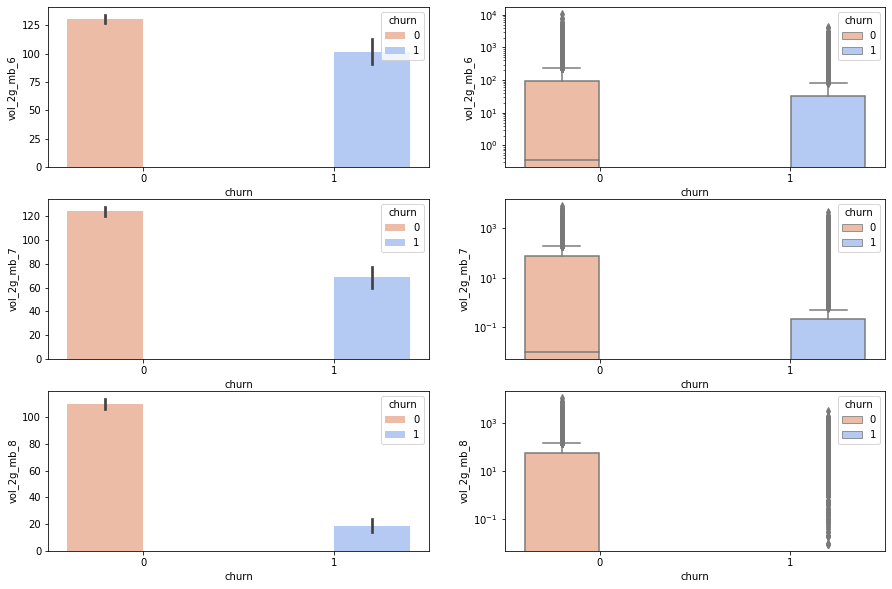

In [201]:
logBar_boxplt('vol_2g_mb')

<span style='color:green'> *The above graphs also shows that a customer who is in action phase has decreased the usuage of 2g Data as well*</span>

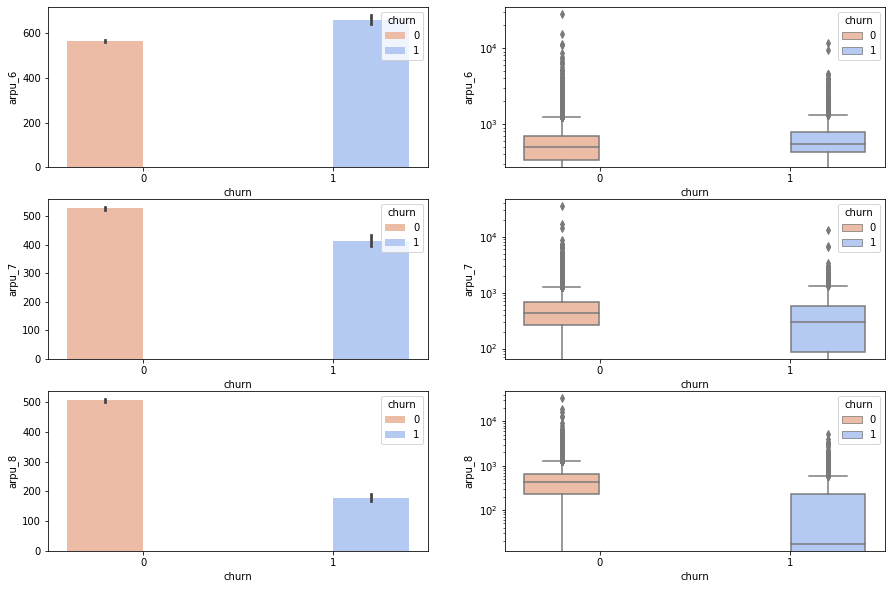

In [202]:
#Plotting against average revenuw per user
logBar_boxplt('arpu')

<span style='color:green'> *For churned customer average revenue per user is constantly decreasing, and became very low in 8th month*</span>

**So far we have done the analysis for recharge and data consumption now lets have a look on outgoing and incoming calls**

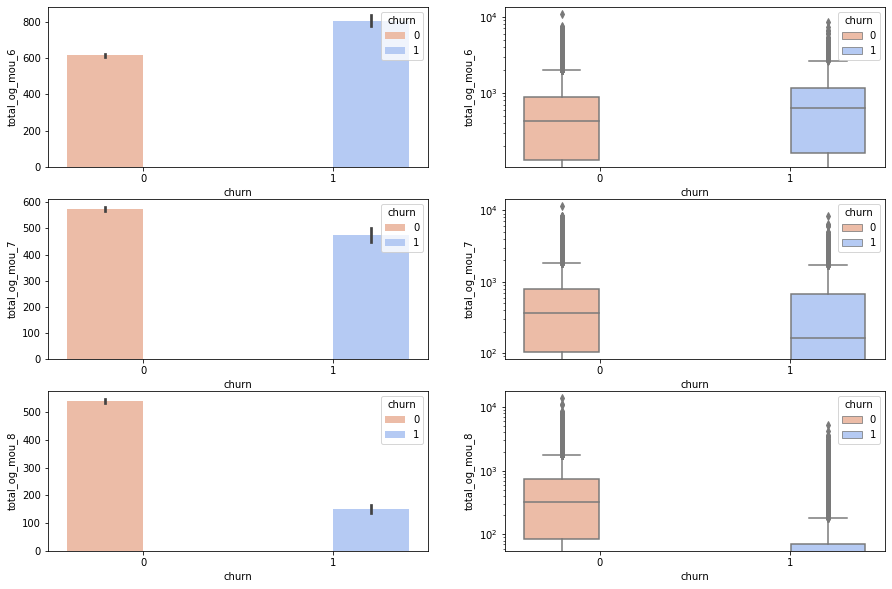

In [203]:
#Total Monthly Outgoing calls
logBar_boxplt('total_og_mou')

<span style='color:green'> *As Clearly visible that monthly outgoing calls have dropped in 8 Month(Action Phase) for the customers who are marked as Churned.The decrease in outgoing calls are the clear indication that the customer is going to get churned.Total outgoing calls will include the all the local, std calls,calls while roaming. Hence we are using the total outgoing calls to see the variations*<span>

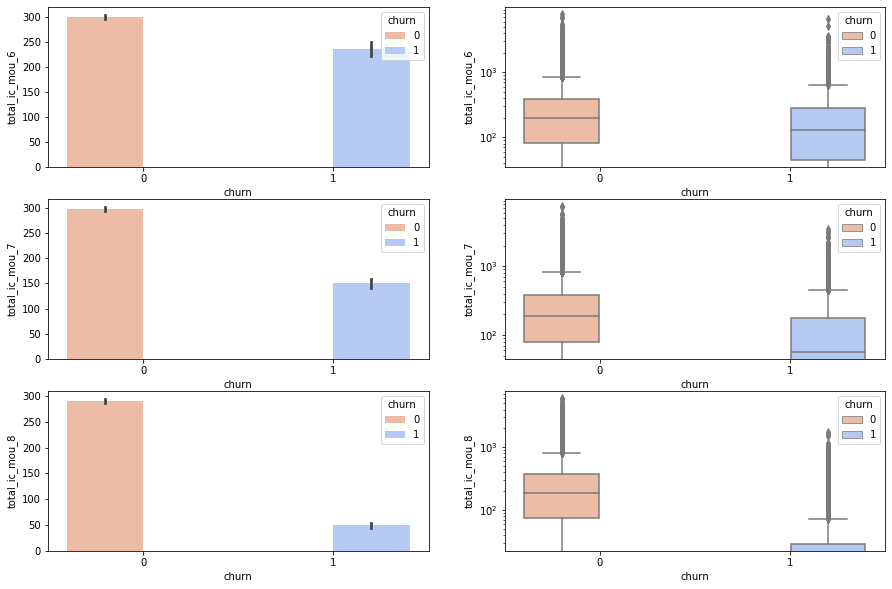

In [204]:
logBar_boxplt('total_ic_mou')

<span style='color:green'>*As per above graphs , incoming calls are also decreased in the action phase month for the churned customer.Here the total incoming calls includes all the std , locals calls,,calls while roaming*</span>

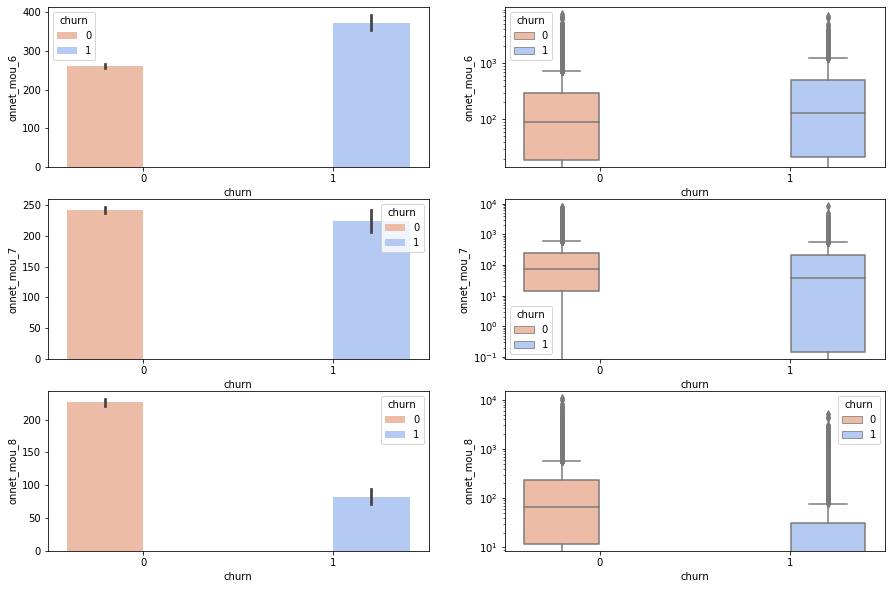

In [205]:
#Checking all kind of calls within same operator network -onnet
logBar_boxplt('onnet_mou')

<span style='color:green'>*The above graphs shows quite intersting visuals , as churned customer minutes of usuage in onnet for good phase was quite good but decreased to a large amount in the action phase*</span>

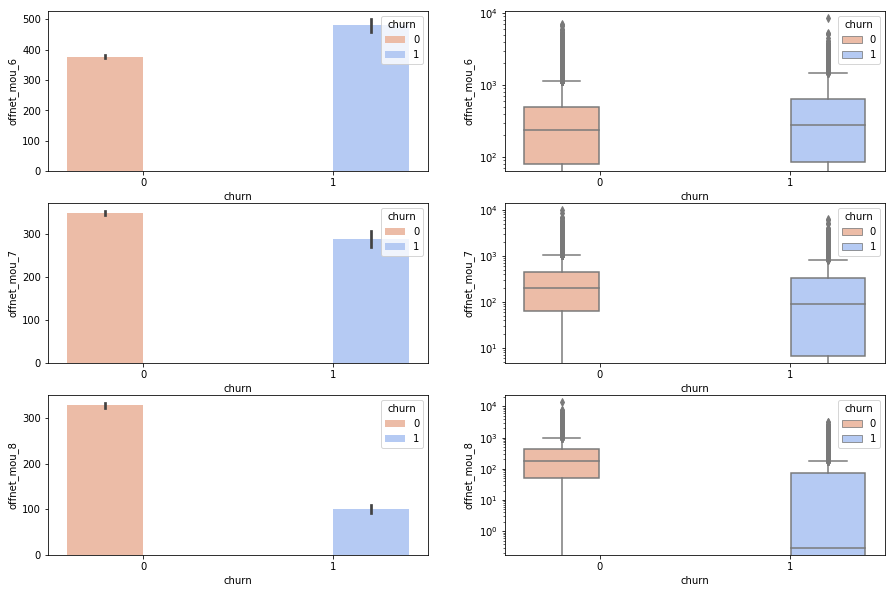

In [206]:
logBar_boxplt('offnet_mou')

<span style='color:green'>*As per above graph offnet calls for goinn to be churned customers has also decreased to a large extent.As per box plot its seems there is some skewness in the month 8 , where mean has dropped to a large extent , but some customers have recharged some big amount as well*</span>

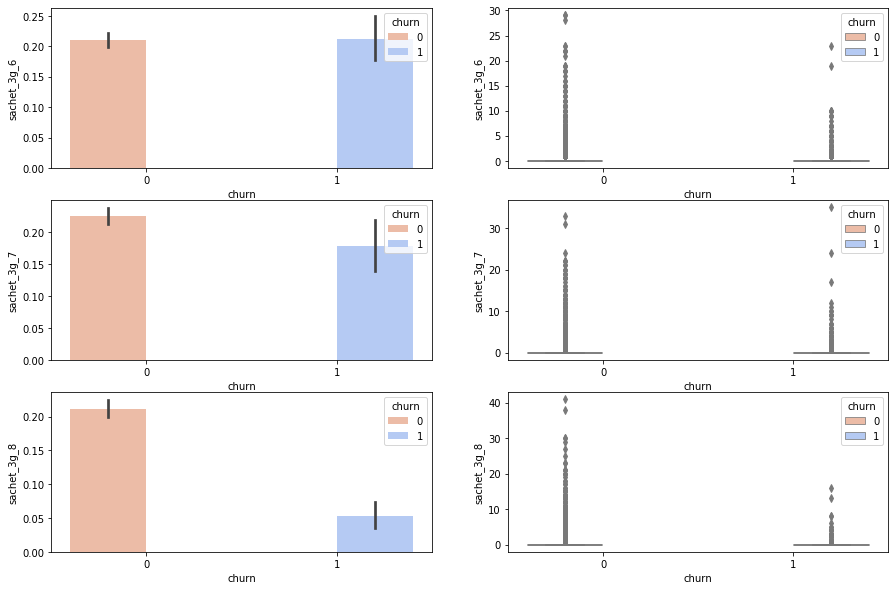

In [207]:
#Plotting against the top recharge for 3g service
nologBar_boxplt('sachet_3g')

<span style='color:green'>*As per the bar plot shown above the 3g top recharge has decreased in the 8 month for the customers who are going to be churned*</span>

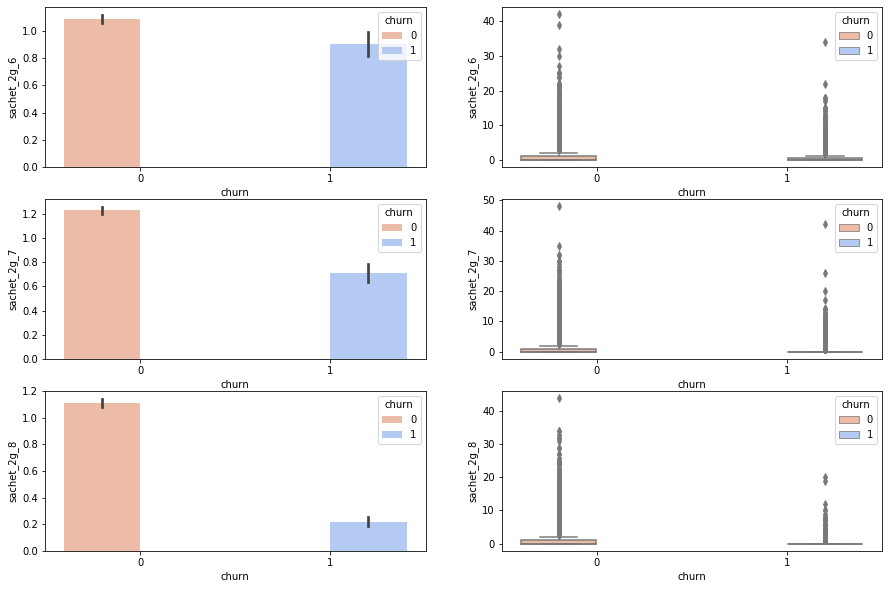

In [208]:
#plotting for 2g data recharge
nologBar_boxplt('sachet_2g')

<span style ='color:green'>*Above graphs shows the decrease in 2g top for the churned customers*</span>

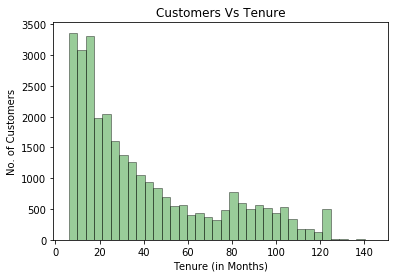

In [209]:
#Lets check the age of network(aon) for the customers using the network
ax = sns.distplot(telecom_df_hcv['aon']/30, hist=True, kde=False, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (in Months)')
ax.set_title('Customers Vs Tenure')
plt.show()

It is visible from the above the graph that number of loyal customer reduces as the time passes, the marked trend can be visualize that people do change their network provider over the period of time. The cause can be high recharge tarrifs, poor network services or coverage in their area.

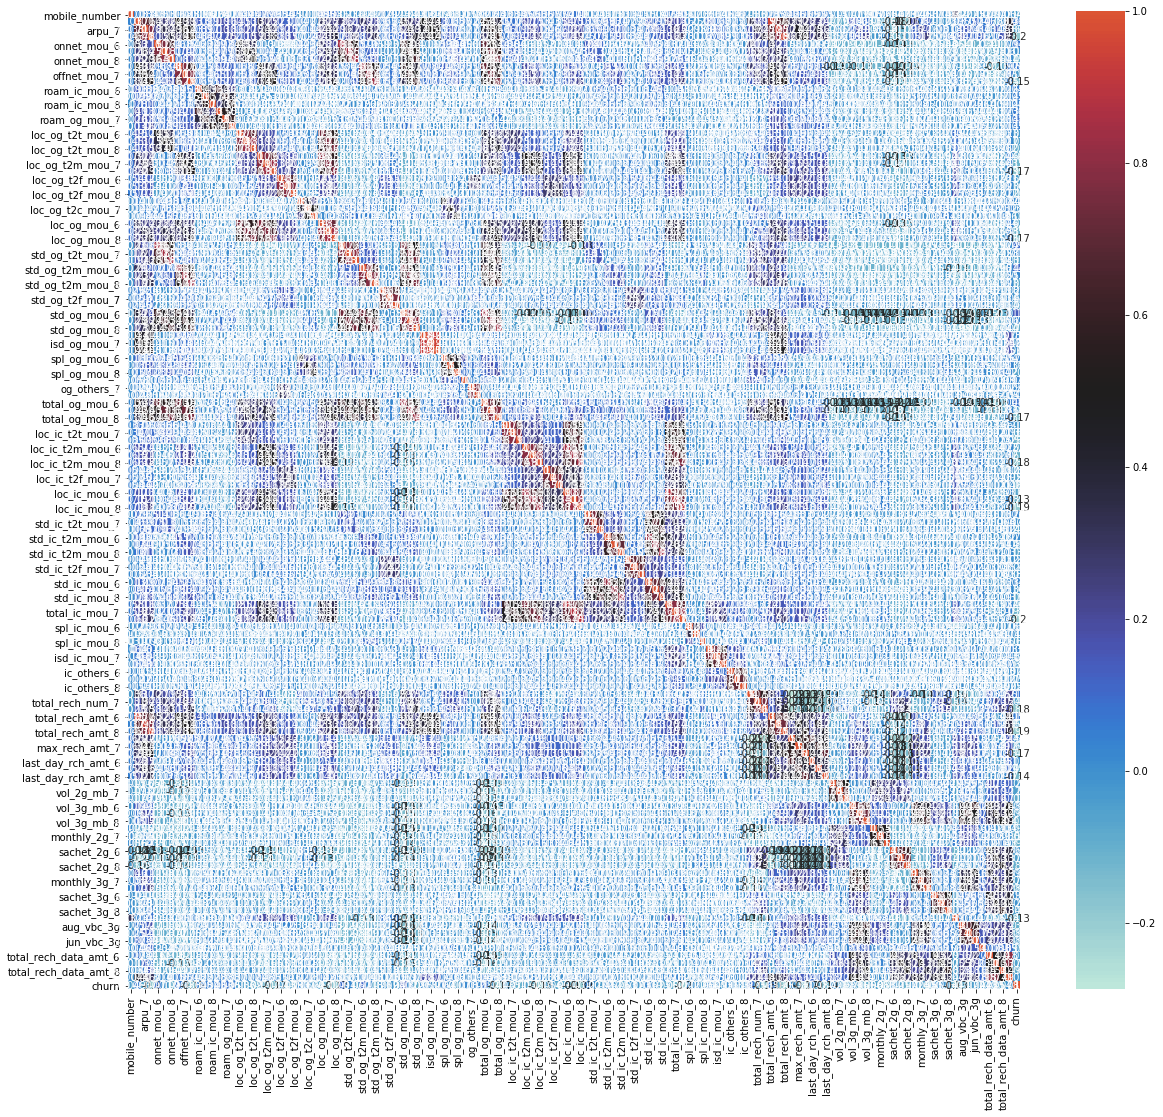

In [210]:
#Creating the Heat map to check the correlation
plt.figure(figsize=(20,18))
sns.heatmap(telecom_df_hcv.corr(), annot=True, center=0.5)
plt.show()

*The correlation is not much visible , we will handle the this multicollineraty during Modelling*

**Modelling**

In [211]:
#Checking the churn rate
churn = (sum(telecom_df_hcv['churn'])/len(telecom_df_hcv['churn'].index))*100
churn

9.786595531843947

From overall data available with us the churn customer data we have is 9.79% which is very less. This will lead to bias model creation as we may not be able to provide good amount of data to train and test. To over come this we will use SMOTE technique, which stand for Synthetic Minority Over-Sampling Technique. 

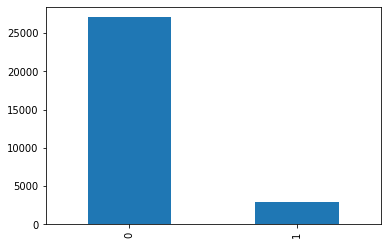

In [212]:
#Plotting the bar chart 
telecom_df_hcv['churn'].value_counts().plot(kind='bar')

Above graphs show the huge difference in data for churn (1) and Non-Churn (0) classes

In [213]:
telecom_df_hcv.shape

(29990, 134)

In [214]:
#deleting the date time coloumn from the datframe as they are not useful for prediction
telecom_df_hcv=telecom_df_hcv.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

In [215]:
#Creating a copy of High Value Customer Dataframe to be use for PCA - principal component Analysis and other modellings
telecom_df_pca=telecom_df_hcv.copy()

In [67]:
#Creating X,y DF with target and independent variable in it.
y=telecom_df_pca['churn']
X=telecom_df_pca.drop(['churn','mobile_number'],axis=1)

In [68]:
y.head()

0     1
6     0
7     1
8     0
13    0
Name: churn, dtype: int64

In [69]:
X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
6    429.023   190.704   255.114        71.03        45.03        76.66   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
6         262.73         49.24         92.08           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
6            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
6              71.03             45.03             76.14            252.23   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
6              48.71             80.63             10.38              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00               0.0              0.00   
6               0.00              0.11               0.0              0.00   
7              53.23              0.00               0.0              0.00   
8               0.00              0.00               0.0              7.15   
13             23.51              0.00               0.0              0.49   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
6         333.64         93.74        156.78              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
6               0.00              0.51              0.00              0.53   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
6              11.45              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94      

In [70]:
# scaling the features
# storing column names in cols 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns


Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8', 'total_rech_amnt_gdphase_6_7'],
      dtype='object', length=129)

In [71]:
X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.838495 -0.620140 -0.522123    -0.585229    -0.525347    -0.489610   
1 -0.325623 -0.669818 -0.439289    -0.432804    -0.427016    -0.313060   
2  1.091754  1.718404  5.408383    -0.461109    -0.405943    -0.369185   
3 -0.436997 -0.048590 -0.675397     0.302517     0.241188    -0.408820   
4 -0.184312 -0.638981  0.238735     0.491508    -0.288658     0.740762   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.797853     -0.718385     -0.679094      -0.209837      -0.170591   
1     -0.254997     -0.614815     -0.474712      -0.209837      -0.170591   
2      0.139030      0.474562      0.044298       0.001111       0.314502   
3     -0.602265     -0.548790     -0.376162      -0.209837      -0.170591   
4      0.056134     -0.467495      0.391778       0.095992       1.918683   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.167518      -0.232789      -0.204836      -0.186901   
1      -0.167518      -0.232789      -0.204836      -0.186901   
2       0.283368      -0.030464      -0.067091       0.199038   
3      -0.167518      -0.232789      -0.204836      -0.186901   
4       0.860086      -0.164779       0.180938      -0.172299   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.371901         -0.341400         -0.335092         -0.664412   
1         -0.067820         -0.152871          0.007204          0.343344   
2         -0.151899         -0.210020         -0.154009          0.568683   
3          0.900121          0.569594         -0.278942         -0.340946   
4         -0.159434         -0.315484         -0.173205         -0.060590   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.645043         -0.624473         -0.290167         -0.286508   
1         -0.439786         -0.274270          0.177523         -0.286508   
2          1.240148          0.080362          2.509212          2.279551   
3         -0.347630         -0.404961         -0.290167         -0.286508   
4         -0.445812          0.654463         -0.085609         -0.286508   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.296603         -0.246659         -0.200448         -0.232186   
1         -0.296603         -0.229971         -0.200448         -0.232186   
2          2.490295         -0.246659         -0.200448         -0.232186   
3         -0.296603         -0.246659         -0.200448          0.802869   
4          0.934281         -0.246659         -0.200448         -0.161252   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.682470     -0.647274     -0.625314         -0.426572   
1      0.194595     -0.395283     -0.187626         -0.426572   
2      0.427294      0.787975      0.088783         -0.416100   
3      0.311444      0.127407     -0.449323         -0.142705   
4     -0.142756     -0.503510      0.362931          0.660602   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.385425         -0.353158         -0.452863         -0.406729   
1         -0.385425         -0.351783         -0.452863         -0.405407   
2         -0.326217         -0.320781         -0.332656         -0.327514   
3         -0.046215         -0.292285         -0.419878         -0.381688   
4         -0.166844          0.990010          0.162410         -0.274687   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.373478         -0.152953         -0.137170         -0.144501   
1         -0.342449         -0.152953         -0.137170         -0.144501   
2         -0.240310          0.400763          1.494555          1.444450   
3         -0.168361         -0.152953         -0.137170         -0.144501   
4          0.051825         -0.152953         -0.137170         -0.144501   



**Principal Component Analysis**

In [72]:
#Initailizing PCA object
pca = PCA(random_state=40)

In [73]:
#Fitting the independent varaible to PCA
pca.fit(X)

PCA(random_state=40)

In [74]:
#Checking the PCs
pca.components_

array([[ 1.65345268e-01,  1.81597168e-01,  1.77674768e-01, ...,
        -2.79477006e-02, -1.66997816e-02,  3.56435457e-02],
       [ 4.16874037e-02,  3.25444275e-02,  1.53180501e-02, ...,
        -4.57090563e-02, -3.82713140e-02, -3.21907087e-02],
       [ 1.31208899e-01,  1.65141392e-01,  1.63381984e-01, ...,
         1.94469258e-01,  1.67493996e-01,  2.49447649e-01],
       ...,
       [-3.62453449e-09,  2.48457641e-07,  2.48845731e-07, ...,
         8.78625877e-08, -8.55891972e-08,  3.11067574e-08],
       [-2.92803237e-07,  1.56754641e-07, -2.18808233e-07, ...,
        -1.96746502e-08, -2.20341480e-08,  4.39155777e-08],
       [ 0.00000000e+00,  1.35634379e-16,  5.76523261e-16, ...,
        -4.13454231e-01, -2.32491033e-17,  7.60575104e-01]])

In [75]:
#getting the variance explained by PCs
pca.explained_variance_ratio_

array([1.14670305e-01, 8.18919642e-02, 5.90849635e-02, 4.47376988e-02,
       4.34582759e-02, 3.49551192e-02, 2.99243851e-02, 2.69357373e-02,
       2.60586337e-02, 2.40487372e-02, 2.35111802e-02, 2.12703737e-02,
       2.08901220e-02, 2.02607674e-02, 1.86909928e-02, 1.79050129e-02,
       1.57515791e-02, 1.53802841e-02, 1.49370542e-02, 1.43723790e-02,
       1.38679761e-02, 1.22908327e-02, 1.09050037e-02, 1.06213833e-02,
       1.02257934e-02, 1.01558312e-02, 9.79927952e-03, 9.14506080e-03,
       8.87322632e-03, 8.20011847e-03, 8.11960815e-03, 7.79410178e-03,
       7.49134044e-03, 7.29266690e-03, 7.04871867e-03, 6.87470024e-03,
       6.65136943e-03, 6.47141873e-03, 6.38216587e-03, 6.24652451e-03,
       6.05014162e-03, 5.91766787e-03, 5.71436096e-03, 5.06449383e-03,
       5.02952438e-03, 4.92969666e-03, 4.82500340e-03, 4.57691299e-03,
       4.43772388e-03, 4.37277325e-03, 3.98545567e-03, 3.92171618e-03,
       3.90696272e-03, 3.72614809e-03, 3.59855247e-03, 3.39352619e-03,
      

<BarContainer object of 129 artists>

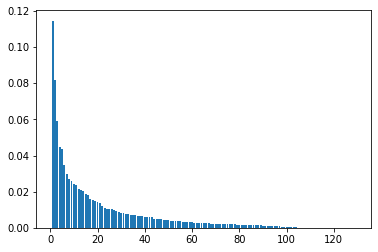

In [76]:
#Plotting the graph with number of PC and explained variance ration
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [77]:
#Getting cumulative score for explained varaince by the PCs
var_cumu = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
var_cumu

array([ 11.5,  19.7,  25.6,  30.1,  34.4,  37.9,  40.9,  43.6,  46.2,
        48.6,  51. ,  53.1,  55.2,  57.2,  59.1,  60.9,  62.5,  64. ,
        65.5,  66.9,  68.3,  69.5,  70.6,  71.7,  72.7,  73.7,  74.7,
        75.6,  76.5,  77.3,  78.1,  78.9,  79.6,  80.3,  81. ,  81.7,
        82.4,  83. ,  83.6,  84.2,  84.8,  85.4,  86. ,  86.5,  87. ,
        87.5,  88. ,  88.5,  88.9,  89.3,  89.7,  90.1,  90.5,  90.9,
        91.3,  91.6,  91.9,  92.2,  92.5,  92.8,  93.1,  93.4,  93.7,
        94. ,  94.3,  94.6,  94.9,  95.1,  95.3,  95.5,  95.7,  95.9,
        96.1,  96.3,  96.5,  96.7,  96.9,  97.1,  97.3,  97.5,  97.7,
        97.9,  98.1,  98.3,  98.5,  98.7,  98.9,  99. ,  99.1,  99.2,
        99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9, 100. , 100.1,
       100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1,

We can bench mark the varaince we needed as 90% from the data providede, as we have already imputed data above so if we are able to explain 90% of data, we can do a good job here.

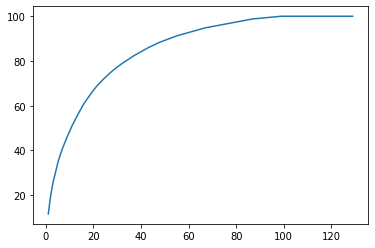

In [78]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

*As per the explained variance distribution and graph we will use 90.1 explained variance with 52 components will be capable enough to do so*

In [81]:
# Splitting the test train data.
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)

In [82]:
#Making a SMOTE object
smote = SMOTE()

In [216]:
#Passing the train data for over coming the minority issue of churn data availability to SMOTE
x_train_sm, y_train_sm=smote.fit_sample(x_train,y_train)

In [84]:
x_train_sm.shape

(37920, 129)

In [85]:
#performing the Incremental PCA
pca_inc=IncrementalPCA(n_components=52)

In [86]:
#Transforming the Train and test data from PCA object
x_train_pca=pca_inc.fit_transform(x_train_sm)
x_test_pca=pca_inc.transform(x_test)

In [87]:
x_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
29500 -0.341972 -0.108238 -0.200976    -0.449543    -0.382731    -0.197839   
16861 -0.162042 -0.702812 -0.594534    -0.547547    -0.513206    -0.460638   
5067  -0.033210  0.485417  0.396893    -0.482783    -0.372621    -0.437078   
16443  0.374616 -0.398631  0.317542    -0.484929    -0.388146    -0.252766   
24656  0.149166  0.111492  0.425985     2.028480     1.328680     1.544958   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
29500      0.495659      0.506996      0.549214      -0.209837      -0.170591   
16861     -0.092282     -0.420106     -0.366373       0.887274      -0.170591   
5067       0.977211      1.071015      1.292161      -0.209837      -0.170591   
16443      0.781685      1.054188      0.521913       0.124196      -0.170591   
24656     -0.322913     -0.226911      0.089401      -0.209837      -0.170591   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
29500      -0.167518      -0.232789      -0.204836      -0.186901   
16861      -0.167518       0.979374      -0.204836      -0.186901   
5067        1.706851      -0.232789      -0.204836       1.866103   
16443      -0.123626       0.068909      -0.204836      -0.159725   
24656      -0.167518      -0.232789      -0.204836      -0.186901   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
29500         -0.225361         -0.194069         -0.290540          0.381819   
16861         -0.331617         -0.318122         -0.313018         -0.141776   
5067          -0.250919         -0.062856         -0.242887          0.079888   
16443         -0.172662         -0.085632          0.124854          2.161882   
24656         -0.341120         -0.287684         -0.309961          0.005134   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
29500          0.528977          0.808217         -0.090565         -0.011474   
16861         -0.207941         -0.303371         -0.268540         -0.286508   
5067           0.429319         -0.207383         -0.290167         -0.286508   
16443          2.853461          1.654427          0.240602          0.024360   
24656         -0.193824          0.184081         -0.227988         -0.174354   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
29500         -0.239012         -0.245142         -0.200448         -0.232186   
16861         -0.296603         -0.246659         -0.200448         -0.232186   
5067          -0.296603         -0.246659         -0.191153         -0.232186   
16443         -0.079850         -0.246659         -0.200448         -0.232186   
24656         -0.231159         -0.246659         -0.200448         -0.162700   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
29500      0.107556      0.212220      0.326332         -0.355970   
16861     -0.312575     -0.353482     -0.405214         -0.422359   
5067      -0.118440      0.216951     -0.299966         -0.379131   
16443      1.330463      1.766797      1.136716         -0.426572   
24656     -0.219385     -0.318428     -0.086482          2.522150   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
29500         -0.308879         -0.038333          0.396969          0.336637   
16861         -0.385425         -0.332508         -0.337066         -0.311751   
5067          -0.376756         -0.353158          1.131124          0.977244   
16443         -0.381027         -0.351730         -0.437949         -0.396603   
24656          1.740416          2.013367         -0.306153         -0.097051   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
29500          0.229301         -0.152953         -0.137170         -0.144501   
16861         -0.227601          2.032811         -0.137170          1.106274   
5067           1.230581         

In [88]:
x_test_pca.shape

(8997, 52)

In [89]:
x_train_pca.shape

(37920, 52)

In [90]:
corrmat=np.corrcoef(x_train_pca.transpose())

In [91]:
corrmat.shape

(52, 52)

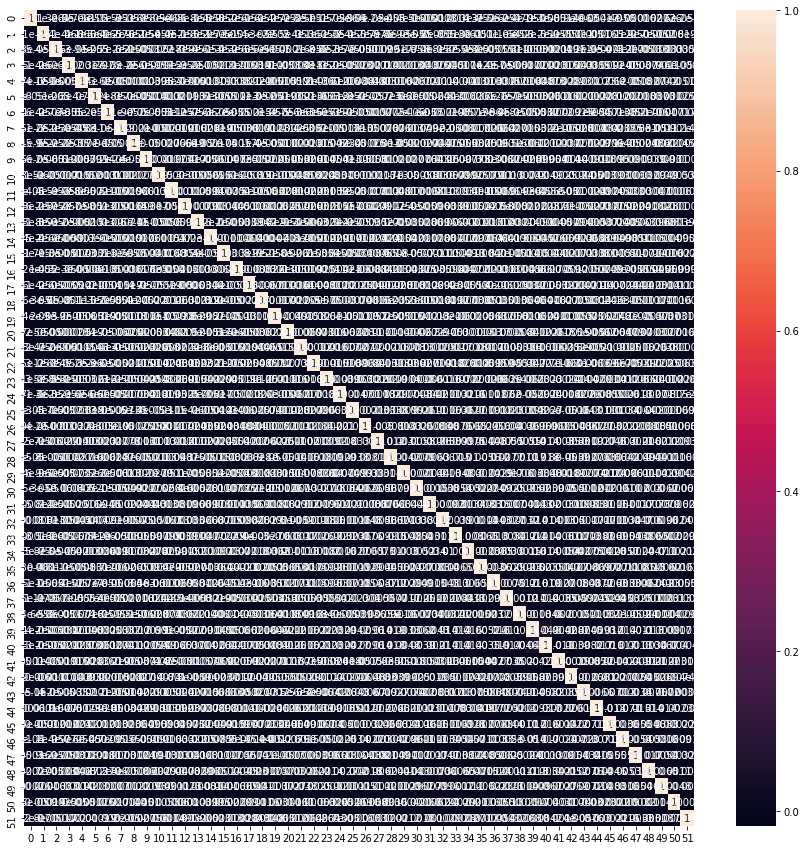

In [92]:
#Creating the heatmap to check the correlation between the components
plt.figure(figsize=(15,15))
sns.heatmap(corrmat,annot=True)
plt.show()

*From the above correl matrix it is prety clear that non of the feature is co-related with each other, hence we can say our PCA excercise was succesful*

**Logistic Regression**

In [93]:
#Creating the LR object
learn_pca=LogisticRegression()

In [94]:
#Fitting the train data
model_pca=learn_pca.fit(x_train_pca,y_train_sm)

In [95]:
#Checking the performance of model over the test data
pred_prob_test=model_pca.predict_proba(x_test_pca)
"{:2.3}".format(metrics.roc_auc_score(y_test,pred_prob_test[:,1]))

'0.904'

From the above figures we are pleased to see that our model is good enough to provide the area under the curve as 90.4 which mean that model is good enough to explain 90% of test data or unseen data.

**Tree Model Regression**

In [97]:
#Creating the Random Forest Classifier object and fitting the train data.
rfc=RandomForestClassifier()
rfc.fit(x_train_pca,y_train_sm)

RandomForestClassifier()

In [98]:
#using the predict method from  Random Forest Classifier over the test data.
prediction_test=rfc.predict(x_test_pca)

In [99]:
#Getting the accuracy score for  Random Forest model
print("Random Forest Accuracy",metrics.accuracy_score(y_test,prediction_test))

Random Forest Accuracy 0.9065243970212293


The accuracy of the  Random Forest Classifier is simillar to LR model 90% which is again a good sight for us.

In [100]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8095
           1       0.53      0.63      0.58       902

    accuracy                           0.91      8997
   macro avg       0.74      0.78      0.76      8997
weighted avg       0.91      0.91      0.91      8997



The test score of Random Forest is also simillar to train data, hence we can say the model is balance with respect to Bais- variance trade off.

In [101]:
print(confusion_matrix(y_test,prediction_test))

[[7587  508]
 [ 333  569]]


**Tunning of the Hyper Parameters**

In [103]:
#Hyper Param tune 
#1. tunning Max Depth

n_fold=3

params={'max_depth' :range(2,20,5)}

rf=RandomForestClassifier()

rf=GridSearchCV(rf,params,cv=n_fold,scoring="accuracy",
               return_train_score=True)
rf.fit(x_train_pca,y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [104]:
scores=rf.cv_results_

pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.282025      0.174183         0.131807        0.003776   
1      17.755579      0.109206         0.259136        0.032131   
2      25.548559      0.299440         0.348592        0.002874   
3      30.025071      0.450759         0.402400        0.009744   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.798497           0.809810   
1               7   {'max_depth': 7}           0.858782           0.865981   
2              12  {'max_depth': 12}           0.919541           0.917959   
3              17  {'max_depth': 17}           0.939241           0.940585   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.801899         0.803402        0.004739                4   
1           0.860918         0.861893        0.003019                3   
2           0.913845         0.917115        0.002401                2   
3           0.933703         0.937843        0.002979                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.808386            0.803797            0.807041   
1            0.878244            0.874960            0.875277   
2            0.959731            0.958544            0.960720   
3            0.985008            0.984652            0.983940   

   mean_train_score  std_train_score  
0          0.806408         0.001926  
1          0.876160         0.001479  
2          0.959665         0.000889  
3          0.984533         0.000444

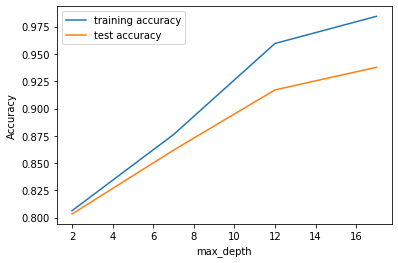

In [105]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
        scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Above graphs show the elbow curve which help us identify the best max depth that will be sufficient for Tree. Here it seem 12 can be the best number as more than that depth is not causing much of a effect on model accuracy

In [106]:
#Tunning Min Sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_fold, 
                   scoring="accuracy", return_train_score=True)
rf.fit(x_train_pca, y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [107]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.748916      0.507547         0.303917        0.010386   
1      19.629823      0.287893         0.275240        0.001080   
2      18.531112      0.345867         0.257969        0.002071   
3      17.533844      0.163998         0.269558        0.037312   
4      16.702105      0.154879         0.229305        0.001845   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.849921   
1                    150  {'min_samples_leaf': 150}           0.843196   
2                    200  {'min_samples_leaf': 200}           0.837658   
3                    250  {'min_samples_leaf': 250}           0.831725   
4                    300  {'min_samples_leaf': 300}           0.830222   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.860127           0.855696         0.855248        0.004179   
1           0.855696           0.848339         0.849077        0.005130   
2           0.852532           0.844304         0.844831        0.006083   
3           0.847547           0.839320         0.839531        0.006461   
4           0.840348           0.836313         0.835628        0.004162   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.867880            0.863291   
1                2            0.857674            0.856013   
2                3            0.850712            0.850633   
3                4            0.846559            0.846915   
4                6            0.842168            0.840546   

   split2_train_score  mean_train_score  std_train_score  
0            0.867009          0.866060         0.001990  
1            0.856606          0.856764         0.000687  
2            0.851661          0.851002         0.000467  
3            0.845926          0.846466         0.000409  
4            0.842168          0.841627         0.000765

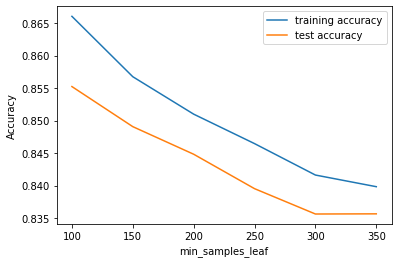

In [108]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Above graphs show that as we keep increasing the number of Sample leaf the accuracy goes down, may be the best accuracy we want for our Tree is around 100 or below.

In [109]:
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_fold, 
                   scoring="accuracy", return_train_score=True)
rf.fit(x_train_pca, y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [110]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      29.702151      1.289339         0.357131        0.006811   
1      28.062334      0.259326         0.341538        0.000825   
2      27.174340      0.503561         0.325585        0.002409   
3      26.047145      0.114916         0.315873        0.001095   
4      25.313585      0.398068         0.306694        0.003039   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.863924   
1                     250  {'min_samples_split': 250}           0.856487   
2                     300  {'min_samples_split': 300}           0.854351   
3                     350  {'min_samples_split': 350}           0.851424   
4                     400  {'min_samples_split': 400}           0.846915   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.872785           0.868275         0.868328        0.003618   
1           0.868354           0.862263         0.862368        0.004845   
2           0.862896           0.859573         0.858940        0.003517   
3           0.863291           0.858782         0.857832        0.004891   
4           0.859968           0.851661         0.852848        0.005395   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.889043            0.883861   
1                2            0.882160            0.877611   
2                3            0.875198            0.871994   
3                4            0.871044            0.865941   
4                5            0.865744            0.862579   

   split2_train_score  mean_train_score  std_train_score  
0            0.887737          0.886880         0.002201  
1            0.879866          0.879879         0.001857  
2            0.874525          0.873906         0.001380  
3            0.871005          0.869330         0.002396  
4            0.864280          0.864201         0.001293

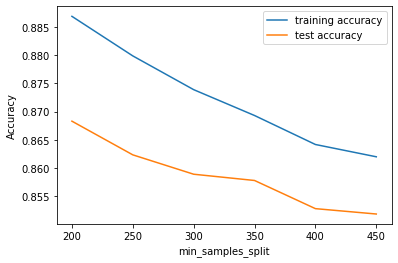

In [111]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The above is show similar result we observe with Min Sample leaf, that accuracy goes to south as we increase the number min sample split.

In [112]:
#Grid Search to Find Optimal Hyperparameters
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 200),
    'min_samples_split': range(200, 350, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [113]:
# Fit the grid search to the data
grid_search.fit(x_train_pca, y_train_sm)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  6.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 300, 200),
                         'min_samples_split': range(200, 350, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [114]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8561708860759495 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


Above are the best set of params to make Tree model to achieve the 85.6% of accuracy.

In [130]:
#Doing the X,y Split again
y=telecom_df_hcv['churn']
X=telecom_df_hcv.drop(['mobile_number','churn'],axis=1)

In [131]:
# model with the best hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [132]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [133]:
# predict
predictions = rfc.predict(X_test)

In [134]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8079
           1       0.79      0.53      0.64       918

    accuracy                           0.94      8997
   macro avg       0.87      0.76      0.80      8997
weighted avg       0.93      0.94      0.93      8997



In [135]:
print(confusion_matrix(y_test,predictions))

[[7949  130]
 [ 429  489]]


In [136]:
# accuracy score
print ('Accuracy Score for Random Forest with tunned Hyper Parameters :',metrics.accuracy_score(y_test, predictions))

Accuracy Score for Random Forest with tunned Hyper Parameters : 0.9378681782816495


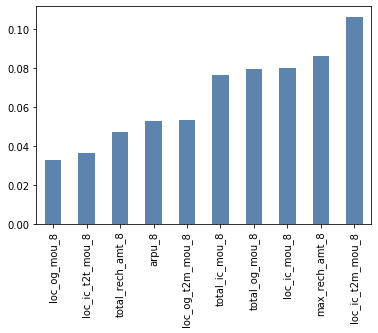

In [146]:
# Scaling all the variables to a range of 0 to 1
features = X.columns.values
X = pd.DataFrame(scale(X))
X.columns = features

importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'bar',color=(0.2, 0.4, 0.6, 0.8))
plt.show()

Above graph show the weightge of each feature to help in identiying the customers who are going to churn.
<p>
We have already observer above that the accuracy and performance of Logistic Regression and Tree model is similar. But when it come to computation performance we can use Logistic Regression, as Tree model are high in computation time due to large set of data.

**Summary : Telecom Churn case study**
<p>
1. People tend to churn as time as they get old in network, as we seen less number of loyal customers. There might various factor related to network coverage change in locality or poor service quality reason behind the churning.
<br>
2. Local income from Mobile is most prominent feature to identifying the churning customers.
<br>
3. Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
<br>
4. People with less than 4 Yrs of Tenure are more likely to Churn.
<br>
5. Max Recharge Amount is a good Churn Indicator.
<br>
6. Logistic Regression is best Model to be use for predicting the churing of customer when we compare with Tree Model, as Tree model is high in computational cost. 
<br>
7. Behaviour is 8 Month can be the base of Churn Analysis.
